# Task # 1 - Introduction to Observational Seismology in Python

Welcome to the first laboratory task of observational seismology. In this set of laboratories, we will learn the skills of modern observational seismology via the Python/Obspy workflow. Today, you will implement a basic seismological workflow; downloading, selecting, processing and plotting seismic waveforms. We will be skipping over some parts of the scientific python ecosystem in favor of jumping right into the seismology - these will be saved for the second lab session. 

## Importing Obspy

In [57]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
client = Client("IRIS", timeout=600)

## Searching for Events

In [75]:
st = UTCDateTime("2010-02-27T00:00:00Z")
et = st + 24*3600
mm = 8
catalogue = client.get_events(starttime=st, endtime=et, minmagnitude=mm)
catalogue

1 Event(s) in Catalog:
2010-02-27T06:34:13.330000Z | -36.148,  -72.933 | 8.8 MW

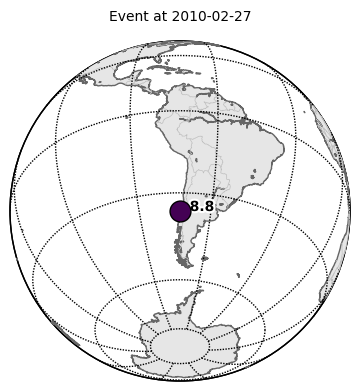

In [76]:
catalogue.plot(projection='ortho');

### Task 1.1
Make a plot of all > 6.5 magnitude earthquakes along the coast of Peru & Chile between the latitudes of 30S and 0, from 1975 to the beginning of 2017. Make the projection local & turn the magnitude label off so that you can see the spatial variation clearly. What trend do you see in the data? From your knowledge of plate tectonics, or a judicious internet search, what is the likely cause of this trend?

#### *Hint*: 
You should look at the Obspy documentation to observe how to restrict the spatial range of your search appropriately, and to turn the magnitude plotting off. The url for the catalogue search is https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
and for the catalogue plotting
https://docs.obspy.org/packages/autogen/obspy.core.event.catalog.Catalog.plot.html#obspy.core.event.catalog.Catalog.plot

#### Your Code: 

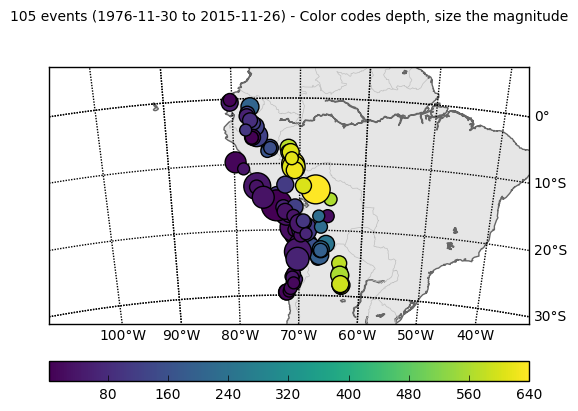

In [82]:
# Start your code here: 

#A possible acceptible answer
st = UTCDateTime("1975-01-01T00:00:00Z")
et = UTCDateTime("2017-01-01T00:00:00Z")
mm = 6.5
catalogue = client.get_events(starttime=st, 
                              endtime=et, 
                              minmagnitude=mm,
                              minlongitude=-85,
                              maxlongitude=-50,
                              minlatitude=-30,
                              maxlatitude=0)

catalogue.plot(projection='local', label=None);

#### Your Answer:

## Downloading

In [38]:
evt_st = catalogue[0].origins[0].time
seismograms = client.get_waveforms(network = "CI", 
                                   station = "USC", 
                                   location = "", 
                                   channel = "BH*", 
                                   starttime = evt_st, 
                                   endtime = evt_st+3600)

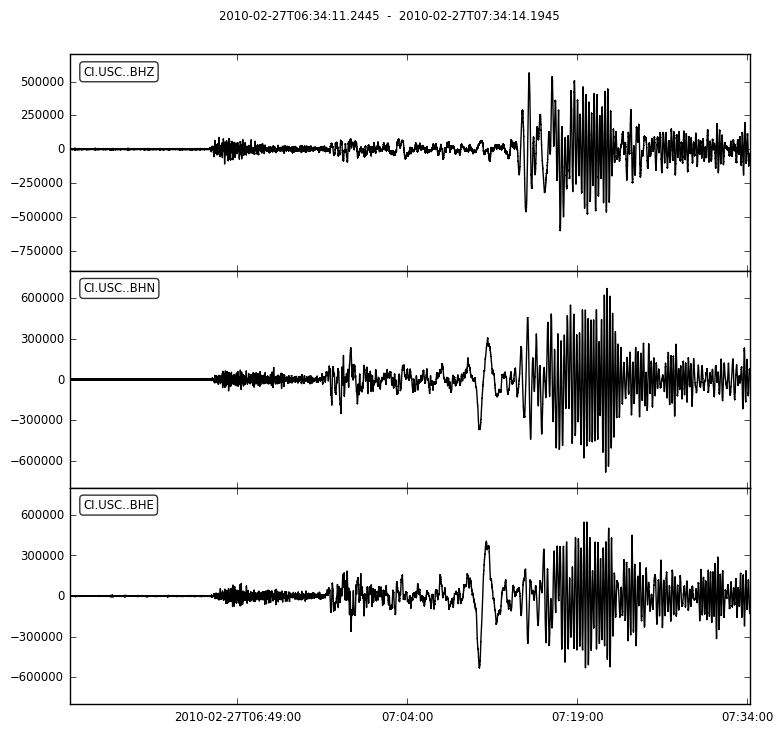

In [39]:
seismograms.plot()

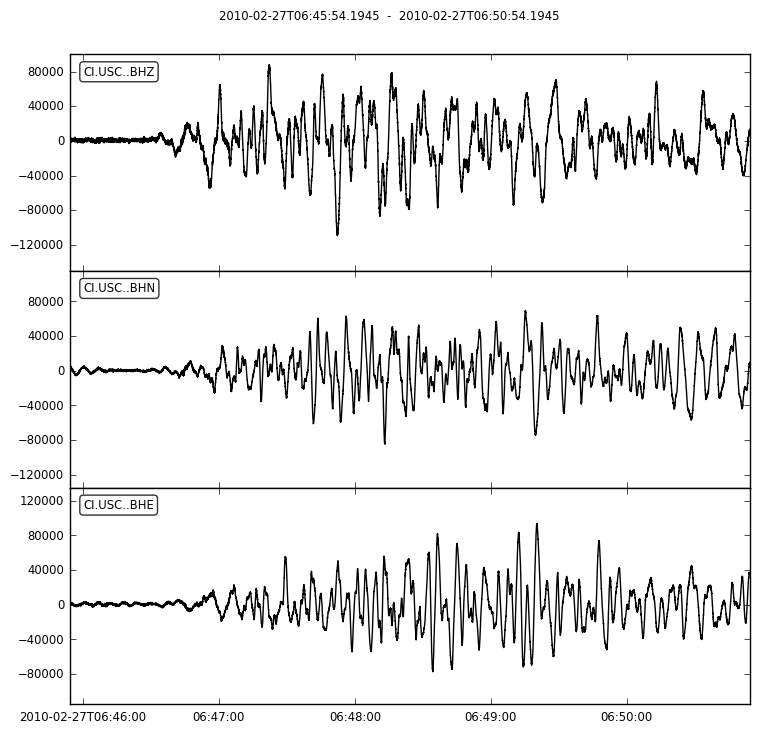

In [44]:
p_wave_seismogram = seismograms.copy().trim(starttime=evt_st+700, endtime=evt_st+1000)
p_wave_seismogram.plot()

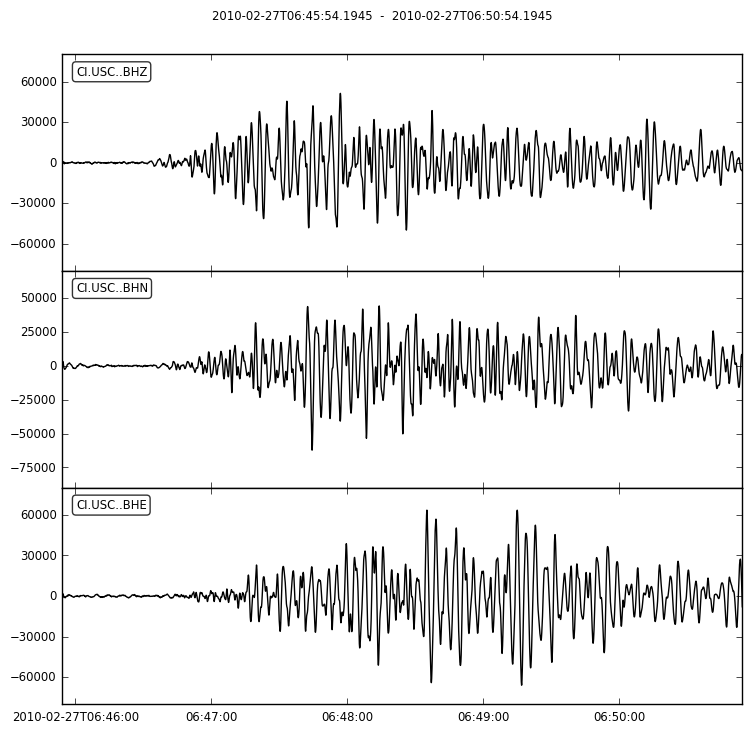

In [48]:
p_wave_seismogram.copy().filter('bandpass', freqmin=0.2, freqmax=2).plot()